In [4]:
import findspark
findspark.init()

In [5]:
import pyspark
import seaborn as sns
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()

In [6]:
df_games = spark.read.csv("E:/DATASETS/games.csv",header = True, nullValue="NA")

In [7]:
df_games.show()

+--------------------+-----+--------------------+-------+--------------------+--------------------+--------------------+
|                Name|Sales|              Series|Release|               Genre|           Developer|           Publisher|
+--------------------+-----+--------------------+-------+--------------------+--------------------+--------------------+
|PlayerUnknown's B...|   42|                null| Dec-17|       Battle royale|        PUBG Studios|             Krafton|
|           Minecraft|   33|           Minecraft| Nov-11|   Sandbox, survival|      Mojang Studios|      Mojang Studios|
|          Diablo III|   20|              Diablo| May-12| Action role-playing|Blizzard Entertai...|Blizzard Entertai...|
|         Garry's Mod|   20|                null| Nov-06|             Sandbox|   Facepunch Studios|               Valve|
|            Terraria| 17.2|                null| May-11|    Action-adventure|            Re-Logic|            Re-Logic|
|   World of Warcraft|   14|    

In [12]:
#Manejando los datos con los dataframes
#Vista temporal
df_games.createOrReplaceTempView("vista_temp")
query = "Select Name,Sales from vista_temp"
datos_convertidos = spark.sql(query)
datos_convertidos.show()
datos_convertidos.count()

+--------------------+-----+
|                Name|Sales|
+--------------------+-----+
|PlayerUnknown's B...|   42|
|           Minecraft|   33|
|          Diablo III|   20|
|         Garry's Mod|   20|
|            Terraria| 17.2|
|   World of Warcraft|   14|
|         Half-Life 2|   12|
|The Witcher 3: Wi...|   12|
|           StarCraft|   11|
|            The Sims|   11|
|           Fall Guys|   10|
|RollerCoaster Tyc...|   10|
|           Half-Life|    9|
|                Rust|    9|
|      Civilization V|    8|
|          The Sims 3|    7|
|Euro Truck Simula...|  6.5|
|          Guild Wars|    6|
|StarCraft II: Win...|    6|
|          The Sims 2|    6|
+--------------------+-----+
only showing top 20 rows



175

<Axes: xlabel='Name', ylabel='Sales'>

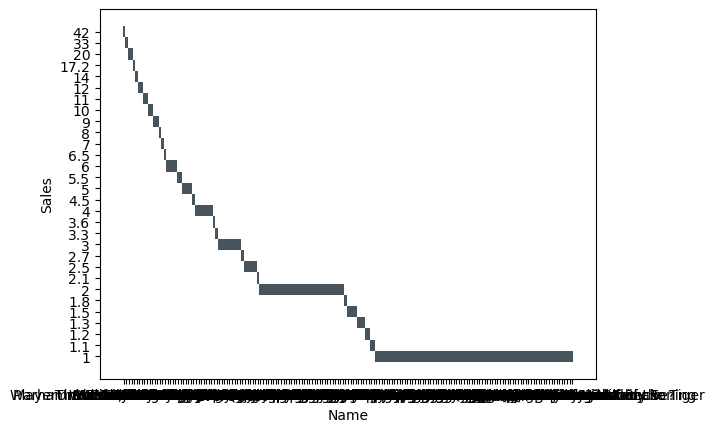

In [37]:
visualizar_datos = df_games.toPandas()
sns.set_palette("Paired")
sns.histplot(x="Name",y="Sales",data=visualizar_datos)

In [21]:
new_datos = datos_convertidos.toPandas()

In [25]:
new_datos.dtypes
new_datos['Sales']=new_datos['Sales'].astype('float64')
new_datos.dtypes

Name      object
Sales    float64
dtype: object

<Axes: xlabel='Name'>

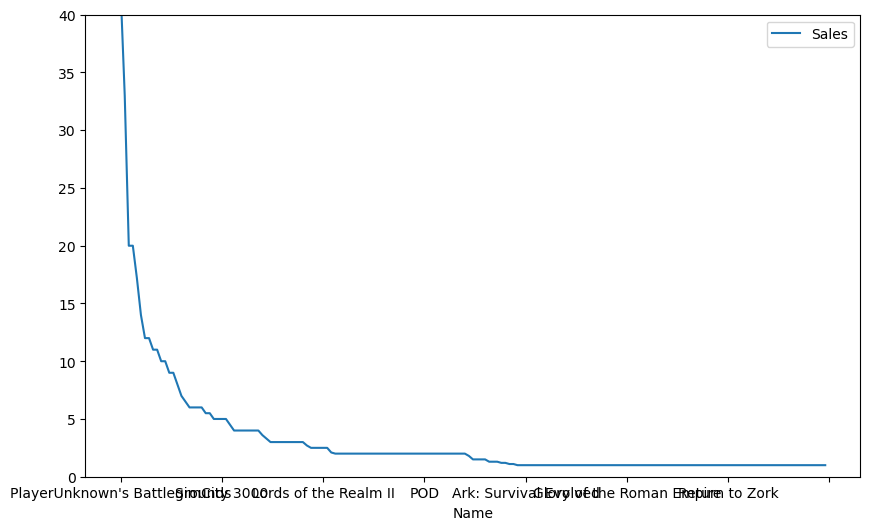

In [35]:
new_datos.plot(x='Name',y='Sales',figsize=(10,6), ylim=(0,40))

In [38]:
new_datos.describe()

,Sales
count,175.000000
mean,3.141143
std,4.960513
min,1.000000
25%,1.000000
50%,1.500000
75%,3.000000
max,42.000000
